In [206]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

# Linear SVM

In [207]:
import scipy.io as sio
data_path = 'ex6data1.mat'
data = sio.loadmat(data_path)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


(51, 2) (51, 1)


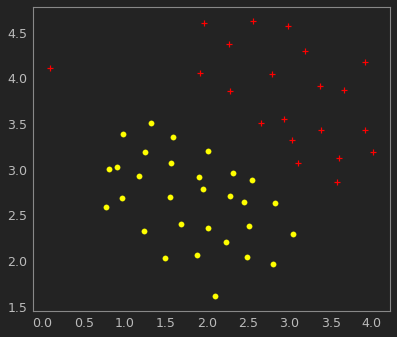

In [208]:
X = data['X']
y = data['y']
pos = (y == 1).ravel()
plt.grid(False)
plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='red')
plt.scatter(X[~pos, 0], X[~pos, 1], marker='o', c='yellow')
print(X.shape, y.shape)
plt.show()

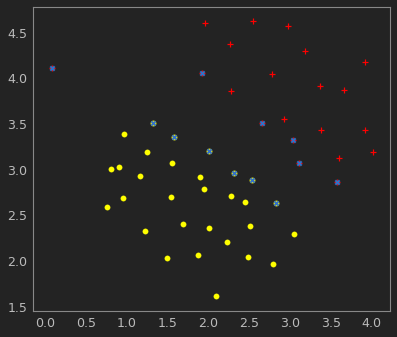

In [209]:
clf = SVC(kernel='linear', C=1)
clf.fit(X, y.ravel())
#pred = clf.predict(X)
plt.grid(False)
plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='red')
plt.scatter(X[~pos, 0], X[~pos, 1], marker='o', c='yellow')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], marker='X')
plt.show()

In [210]:
def visualize_boundary(clf, X, pos):
    ax = plt.gca()
    ax.scatter(X[pos, 0], X[pos, 1], marker='+', c='red')
    ax.scatter(X[~pos, 0], X[~pos, 1], marker='o', c='yellow')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='magenta', linewidths=2, levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

In [211]:
from ipywidgets import interact
@interact
def C_train(C=[1, 10, 50, 100]):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y.ravel())
    visualize_boundary(clf, X, pos)
    plt.show()

interactive(children=(Dropdown(description='C', options=(1, 10, 50, 100), value=1), Output()), _dom_classes=('…

# SVM with Gaussian kernel

$k(x,y)=\exp\left(-\frac{\|x-y\|}{\sigma}\right)$

In [212]:
import scipy.io as sio
data_path2 = 'ex6data2.mat'
data2 = sio.loadmat(data_path2)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


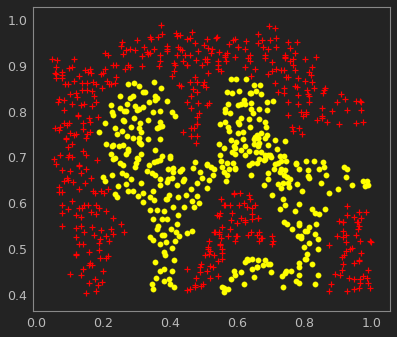

In [213]:
X2 = data2['X']
y2 = data2['y']
pos = (y2 == 1).ravel()
plt.grid(False)
plt.scatter(X2[pos, 0], X2[pos, 1], marker='+', c="red")
plt.scatter(X2[~pos, 0], X2[~pos, 1], marker='o', c="yellow")
plt.show()

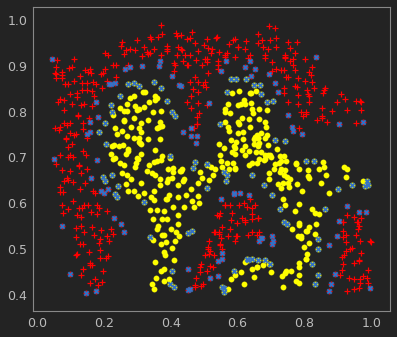

In [214]:
sigma = 0.1
gamma = np.power(sigma,-2.)
gaus_clf = SVC(kernel='rbf', C=1, gamma=gamma)
gaus_clf.fit(X2, y2.ravel())
plt.grid(False)
plt.scatter(X2[pos, 0], X2[pos, 1], marker='+', c='red')
plt.scatter(X2[~pos, 0], X2[~pos, 1], marker='o', c='yellow')
plt.scatter(gaus_clf.support_vectors_[:, 0], gaus_clf.support_vectors_[:, 1], marker='X')
plt.show()

In [215]:
from ipywidgets import interact
@interact
def sigma_train(sigma=[0.05, 0.1, 0.2, 0.3]):
    gamma = np.power(sigma,-2.)
    gaus_clf = SVC(kernel='rbf', C=1, gamma=gamma)
    gaus_clf.fit(X2, y2.ravel())
    visualize_boundary(gaus_clf, X2, pos)
    plt.show()

interactive(children=(Dropdown(description='sigma', options=(0.05, 0.1, 0.2, 0.3), value=0.05), Output()), _do…

# SVM (Gaussian) selecting parameters

In [216]:
import scipy.io as sio
data_path3 = "ex6data3.mat"
data3 = sio.loadmat(data_path3)
print(data3.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


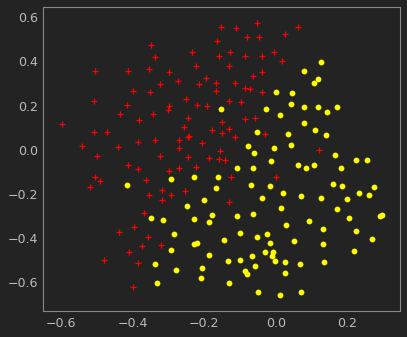

In [217]:
X3 = data3['X']
y3 = data3['y']
X_val = data3['Xval']
y_val = data3['yval']
pos = (y3 == 1).ravel()
plt.grid(False)
plt.scatter(X3[pos, 0], X3[pos, 1], marker='+', c="red")
plt.scatter(X3[~pos, 0], X3[~pos, 1], marker='o', c="yellow")
plt.show()

In [218]:
def C_sigma_params(X, y, x_val, y_val):
    all_params = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    all_C, all_sigma = np.meshgrid(all_params, all_params)
    val_acc = np.zeros(all_C.shape)
    for i in range(val_acc.shape[0]):
        for j in range(val_acc.shape[1]):
            C = all_C[i, j]
            gamma = np.power(all_sigma[i,j],-2.)
            clf = SVC(kernel='rbf', C=C, gamma=gamma)
            clf.fit(X, y.ravel())
            pred = clf.predict(X_val)
            val_acc[i, j] = np.mean(pred == y_val.ravel())
    
    max_acc = np.unravel_index(np.argmax(val_acc), val_acc.shape)
    return all_C[max_acc], all_sigma[max_acc]

In [219]:
C, sigma = C_sigma_params(X3, y3, X_val, y_val)
gamma = np.power(sigma,-2.)
clf = SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X3, y3.ravel())
print(np.mean(clf.predict(X_val) == y_val.ravel()))

0.965


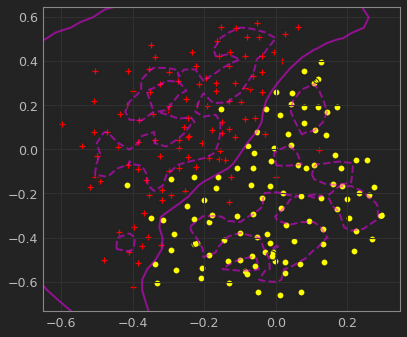

In [220]:
visualize_boundary(clf, X3, pos)
plt.show()